# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
!pip install citipy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

     ---------------------------------------- 0.0/675.6 kB ? eta -:--:--
      --------------------------------------- 10.2/675.6 kB ? eta -:--:--
     - ----------------------------------- 30.7/675.6 kB 325.1 kB/s eta 0:00:02
     -- ---------------------------------- 41.0/675.6 kB 245.8 kB/s eta 0:00:03
     --- --------------------------------- 61.4/675.6 kB 326.1 kB/s eta 0:00:02
     ------ ----------------------------- 112.6/675.6 kB 467.6 kB/s eta 0:00:02
     -------- --------------------------- 153.6/675.6 kB 538.9 kB/s eta 0:00:01
     ------------ ----------------------- 225.3/675.6 kB 687.0 kB/s eta 0:00:01
     ----------------- ------------------ 327.7/675.6 kB 881.8 kB/s eta 0:00:01
     ------------------------ ------------- 440.3/675.6 kB 1.1 MB/s eta 0:00:01
     ------------------------------- ------ 553.0/675.6 kB 1.2 MB/s eta 0:00:01
     -------------------------------------- 675.6/675.6 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing 

### Generate the Cities List by Using the `citipy` Library

In [13]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 583


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [14]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({
            "City": city,
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        })

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | asau
Processing Record 2 of Set 1 | shangri-la
City not found. Skipping...
Processing Record 3 of Set 1 | taiohae
City not found. Skipping...
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | puerto natales
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 8 of Set 1 | college
Processing Record 9 of Set 1 | kerikeri
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | iskateley
Processing Record 12 of Set 1 | new glasgow
Processing Record 13 of Set 1 | pathein
Processing Record 14 of Set 1 | inhambane
Processing Record 15 of Set 1 | talnakh
Processing Record 16 of Set 1 | kismayo
Processing Record 17 of Set 1 | lihue
Processing Record 18 of Set 1 | cabo san lucas
Processing Record 19 of Set 1 | klaksvik
Processing Record 20 of Set 1 | adamstown
Processing Record 21 of Set 1 |

In [15]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          557
Lat           557
Lng           557
Max Temp      557
Humidity      557
Cloudiness    557
Wind Speed    557
Country       557
Date          557
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0        kerikeri -35.2268  173.9474     14.39        90         100   
1           ginir   7.1333   40.7000     22.08        47         100   
2  margaret river -33.9500  115.0667     15.44        67          60   
3             bam  29.1060   58.3570     38.66        10           0   
4       marrakesh  31.6315   -8.0083     17.04        72           0   

   Wind Speed Country        Date  
0        0.98      NZ  1718607765  
1        1.53      ET  1718607742  
2        3.76      AU  1718607768  
3        7.82      IR  1718607769  
4        3.09      MA  1718607770

In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                      
0              kerikeri -35.2268  173.9474     14.39        90         100   
1                 ginir   7.1333   40.7000     22.08        47         100   
2        margaret river -33.9500  115.0667     15.44        67          60   
3                   bam  29.1060   58.3570     38.66        10           0   
4             marrakesh  31.6315   -8.0083     17.04        72           0   

         Wind Speed Country        Date  
City_ID                                  
0              0.98      NZ  1718607765  
1              1.53      ET  1718607742  
2              3.76      AU  1718607768  
3              7.82      IR  1718607769  
4              3.09      MA  1718607770

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

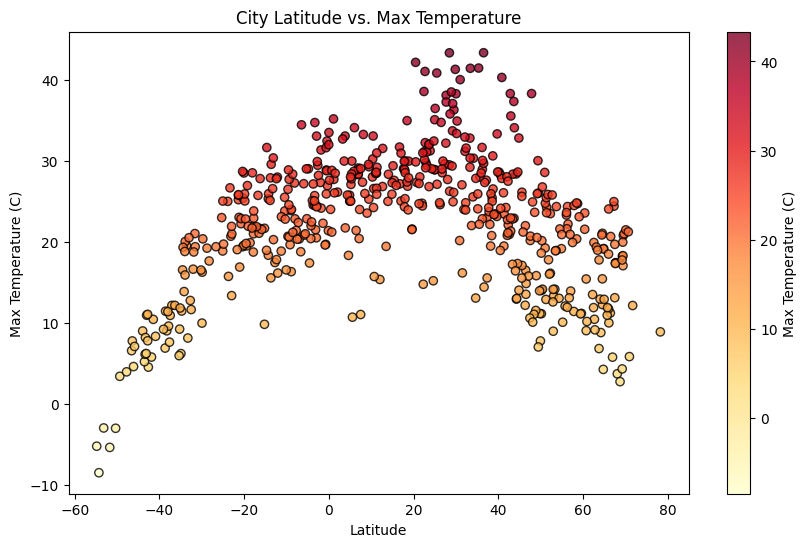

In [18]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(10,6))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], c=city_data_df["Max Temp"], cmap="YlOrRd", edgecolor="black", linewidth=1, alpha=0.8)

# Incorporate the other graph properties
plt.colorbar(label="Max Temperature (C)")
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

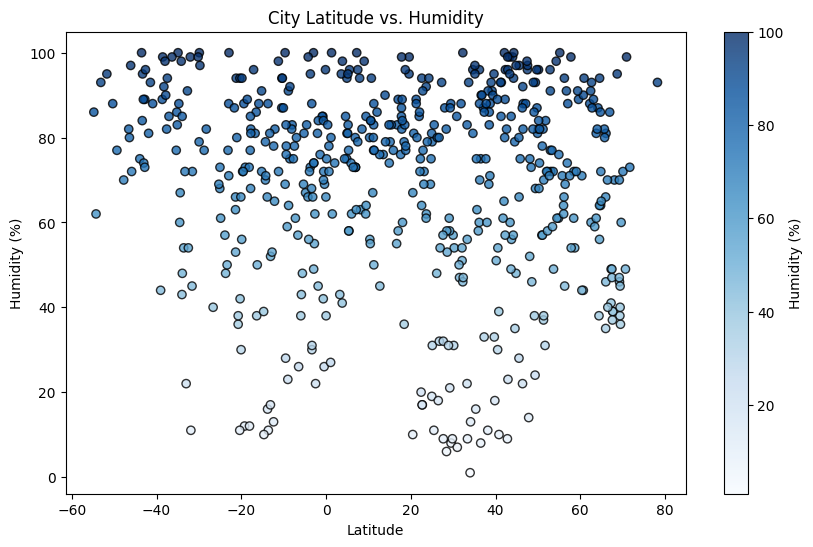

In [19]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(10,6))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], c=city_data_df["Humidity"], cmap="Blues", edgecolor="black", linewidth=1, alpha=0.8)

# Incorporate the other graph properties
plt.colorbar(label="Humidity (%)")
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

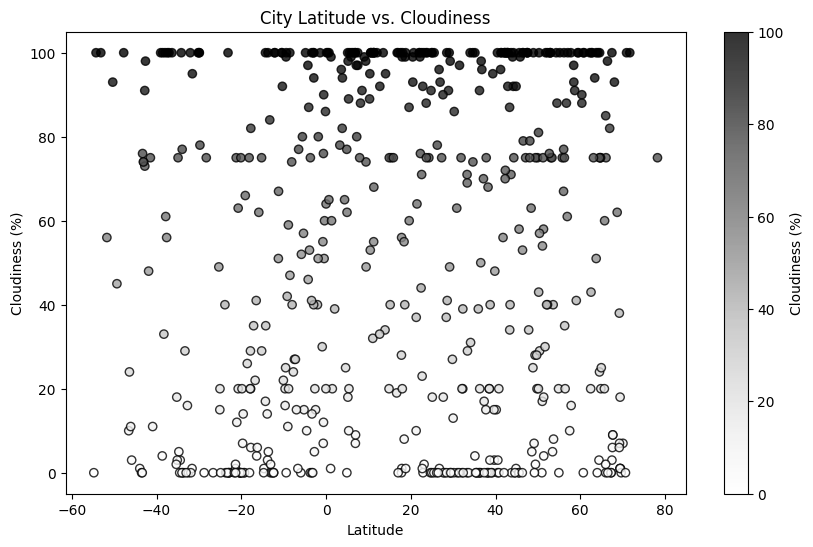

In [20]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(10,6))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], c=city_data_df["Cloudiness"], cmap="Greys", edgecolor="black", linewidth=1, alpha=0.8)


# Incorporate the other graph properties
plt.colorbar(label="Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

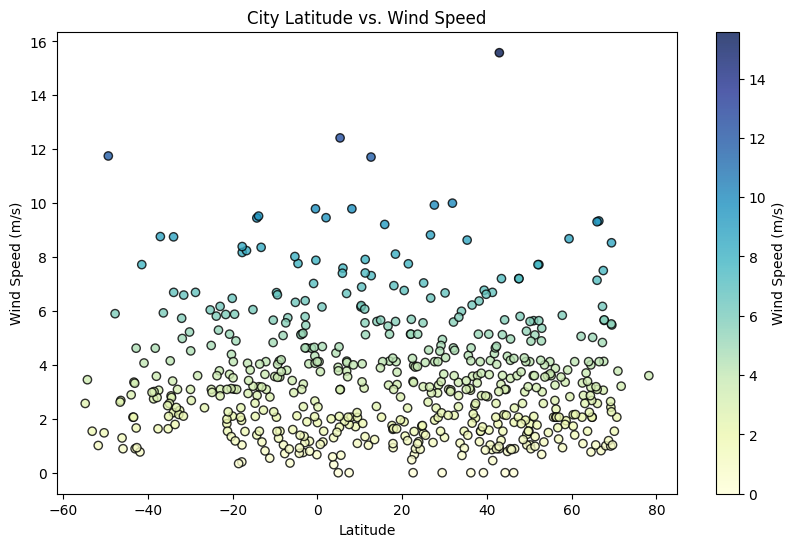

In [21]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(10,6))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], c=city_data_df["Wind Speed"], cmap="YlGnBu", edgecolor="black", linewidth=1, alpha=0.8)


# Incorporate the other graph properties
plt.colorbar(label="Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [22]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, x_label, y_label):
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, (x_values.min(), y_values.max()), fontsize=15, color="red")
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    print(f"The r-value is: {r_value:.4f}")
    return slope, intercept, r_value

In [23]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
0         asau  46.4333   26.4000     16.51        92         100        1.87   
4      college  64.8569 -147.8028     19.18        72          20        2.06   
6       albany  42.6001  -73.9662     20.93        82         100        1.81   
7    iskateley  67.6803   53.1512     17.44        39           9        5.65   
8  new glasgow  45.5834  -62.6486     17.10        97         100        4.96   

  Country        Date  
0      RO  1722938196  
4      US  1722938206  
6      US  1722938209  
7      RU  1722938210  
8      CA  1722938211

In [24]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
1   port-aux-francais -49.3500   70.2167      3.43        77          45   
2      puerto natales -51.7236  -72.4875     -5.34        95          56   
3            waitangi -43.9535 -176.5597      9.02        75           1   
5            kerikeri -35.2268  173.9474      9.25        86          18   
10          inhambane -23.8650   35.3833     25.00        57          40   

    Wind Speed Country        Date  
1        11.75      TF  1722938200  
2         1.01      CL  1722938042  
3         2.89      NZ  1722938203  
5         1.63      NZ  1722938207  
10        5.81      MZ  1722938214

###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.5630


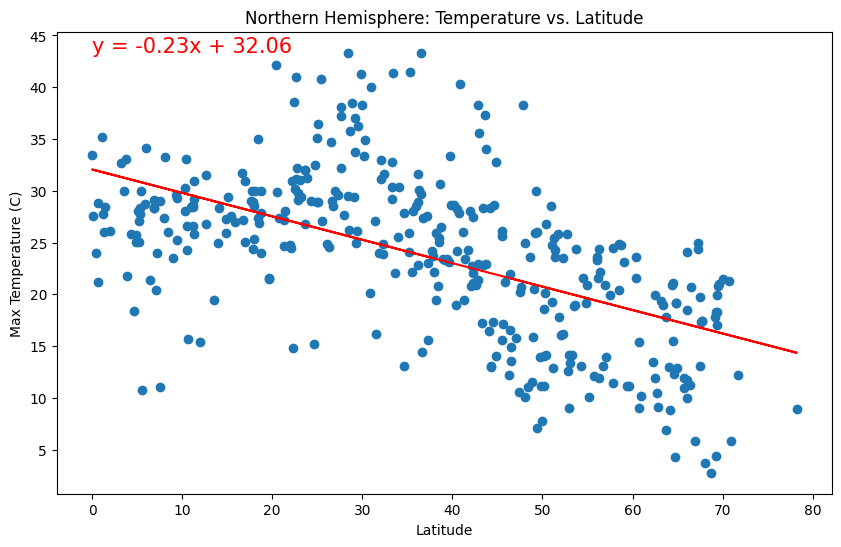

In [25]:
# Linear regression on Northern Hemisphere
plt.figure(figsize=(10,6))
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], 
                       "Northern Hemisphere: Temperature vs. Latitude", "Latitude", "Max Temperature (C)")
plt.savefig("output_data/north_temp_regression.png")
plt.show()

The r-value is: 0.8257


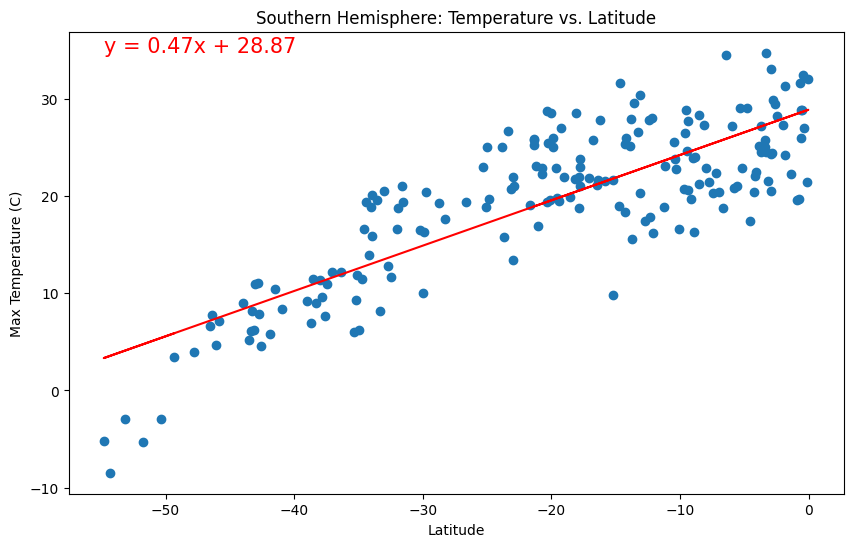

In [26]:
# Linear regression on Southern Hemisphere
plt.figure(figsize=(10,6))
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], 
                       "Southern Hemisphere: Temperature vs. Latitude", "Latitude", "Max Temperature (C)")
plt.savefig("output_data/south_temp_regression.png")
plt.show()

**Discussion about the linear relationship:** 

Based on the linear regression plots for Temperature vs. Latitude in both the Northern and Southern Hemispheres, we can observe the following:

- **Northern Hemisphere:**

    There is a clear negative correlation between latitude and temperature
    As latitude increases (moving further north), the maximum temperature tends to decrease
    The relationship is moderately strong, but there is noticeable scatter around the trend line


- **Southern Hemisphere:**

    There is a positive correlation between latitude and temperature
    As latitude increases (moving closer to the equator), the maximum temperature tends to increase
    The relationship appears stronger than in the Northern Hemisphere, with an r-value of 0.8257



**Key observations:**

The opposite slopes in the two hemispheres reflect the fact that moving away from the equator in either direction leads to cooler temperatures.
The Southern Hemisphere shows a steeper slope, suggesting a more pronounced temperature change with latitude.

These relationships align with the general understanding that equatorial regions are warmer, while higher latitudes (both north and south) experience cooler temperatures.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.0703


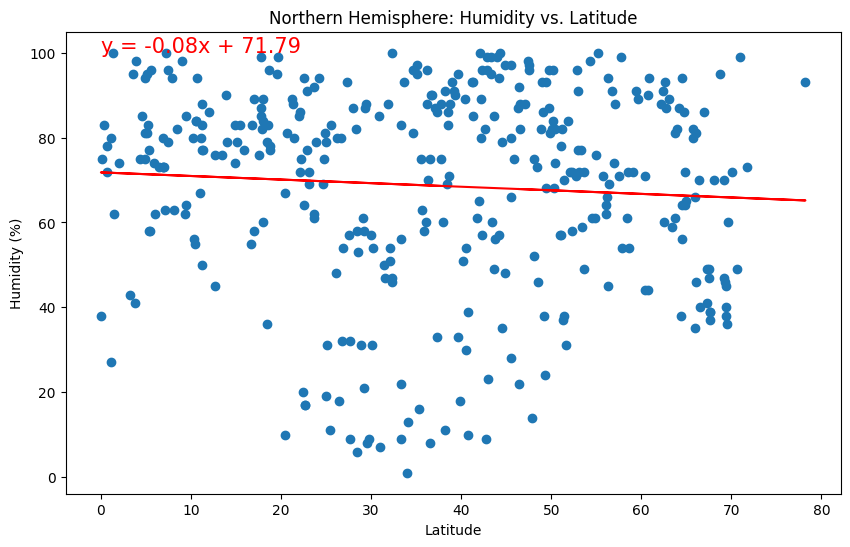

In [27]:
# Northern Hemisphere
plt.figure(figsize=(10,6))
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], 
                       "Northern Hemisphere: Humidity vs. Latitude", "Latitude", "Humidity (%)")
plt.savefig("output_data/north_humidity_regression.png")
plt.show()

The r-value is: -0.2408


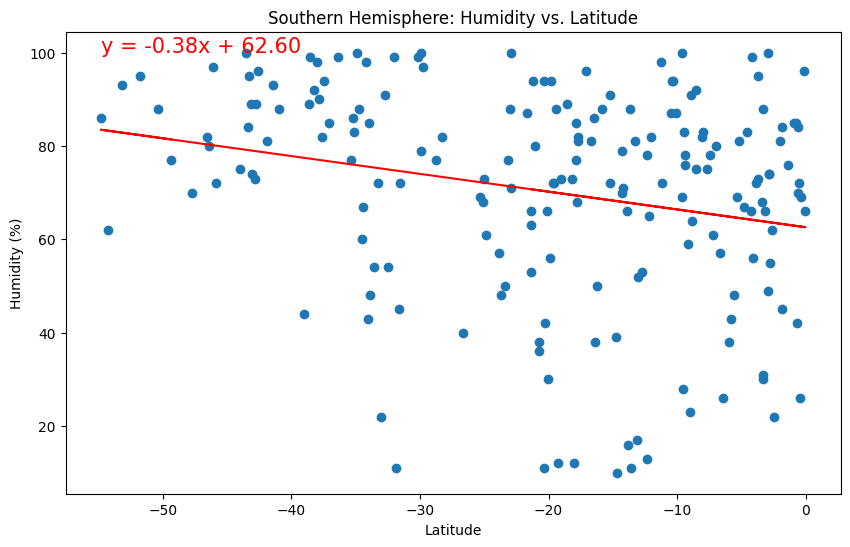

In [28]:
# Southern Hemisphere
plt.figure(figsize=(10,6))
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], 
                       "Southern Hemisphere: Humidity vs. Latitude", "Latitude", "Humidity (%)")
plt.savefig("output_data/south_humidity_regression.png")
plt.show()

**Discussion about the linear relationship:**

Based on the linear regression plots for Humidity vs. Latitude in both the Northern and Southern Hemispheres, we can observe the following:

- **Northern Hemisphere:**

    There is a weak negative correlation between latitude and humidity.
    As latitude increases (moving further north), humidity tends to decrease slightly.
    The relationship is weak, with a low r-value of -0.0703, indicating a minimal inverse relationship and noticeable scatter around the trend line.
  
- **Southern Hemisphere:**

    There is a stronger negative correlation between latitude and humidity compared to the Northern Hemisphere.
    As latitude increases (moving further south towards the South Pole), humidity tends to decrease more significantly.
    The relationship is more pronounced than in the Northern Hemisphere, with an r-value of -0.2408, indicating a moderate inverse relationship.

**Key observations:**

The more negative slope in the Southern Hemisphere suggests a steeper decline in humidity with increasing latitude compared to the Northern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.1445


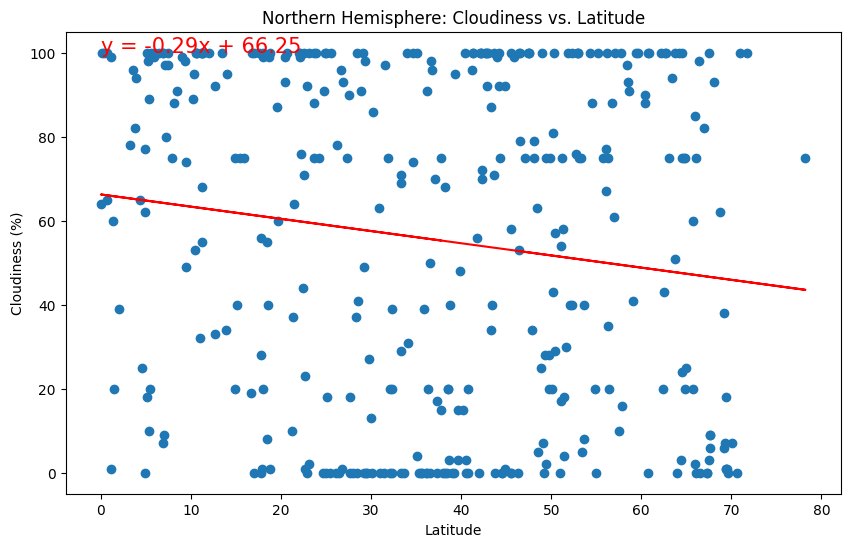

In [29]:
# Northern Hemisphere
plt.figure(figsize=(10,6))
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], 
                       "Northern Hemisphere: Cloudiness vs. Latitude", "Latitude", "Cloudiness (%)")
plt.savefig("output_data/north_cloudiness_regression.png")
plt.show()

The r-value is: -0.0176


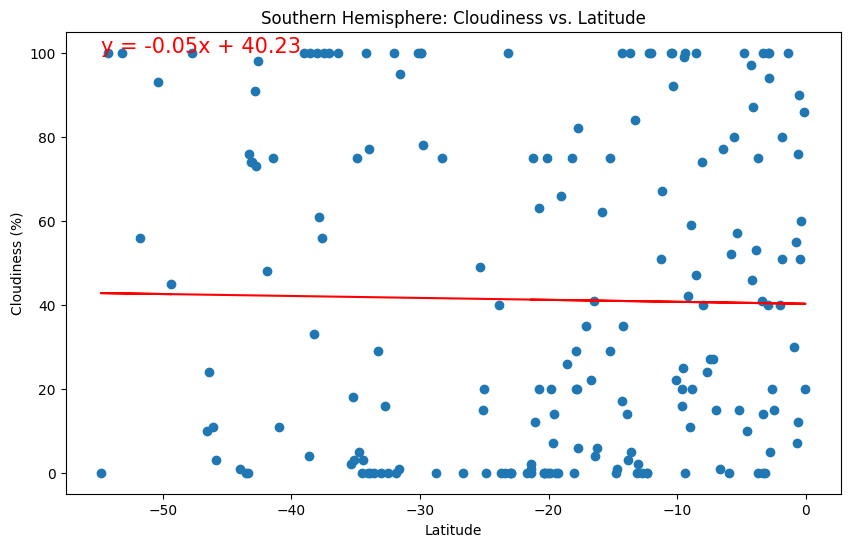

In [30]:
# Southern Hemisphere
plt.figure(figsize=(10,6))
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], 
                       "Southern Hemisphere: Cloudiness vs. Latitude", "Latitude", "Cloudiness (%)")
plt.savefig("output_data/south_cloudiness_regression.png")
plt.show()

**Discussion about the linear relationship:** 

Based on the linear regression plots for Cloudiness vs. Latitude in both the Northern and Southern Hemispheres, we can observe the following:

- **Northern Hemisphere:**

    There is a weak negative correlation between latitude and cloudiness.
    As latitude increases (moving further north), cloudiness tends to decrease slightly.
    The relationship is very weak.

- **Southern Hemisphere:**

    There is an extremely weak negative correlation between latitude and cloudiness.
    As latitude increases (moving closer to the equator), cloudiness shows a very slight decrease.
    The relationship is almost nonexistent, with an r-value of -0.0176, and the data points are widely scattered around the trend line.

**Key observations:**

- The negative slopes in both hemispheres suggest that as one moves away from the equator, cloudiness tends to decrease slightly.
- The slope is steeper in the Northern Hemisphere (-0.29) compared to the Southern Hemisphere (-0.05), indicating a more noticeable but still weak decrease in cloudiness with increasing latitude in the Northern Hemisphere.
- The correlation strength is very weak in both hemispheres, with the Southern Hemisphere showing an almost negligible relationship.

These relationships indicate that latitude has a minimal impact on cloudiness in both hemispheres, with a slightly more noticeable effect in the Northern Hemisphere. The overall trend aligns with the idea that cloudiness may vary slightly with latitude, but other factors likely play a more significant role in determining cloudiness levels.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.0629


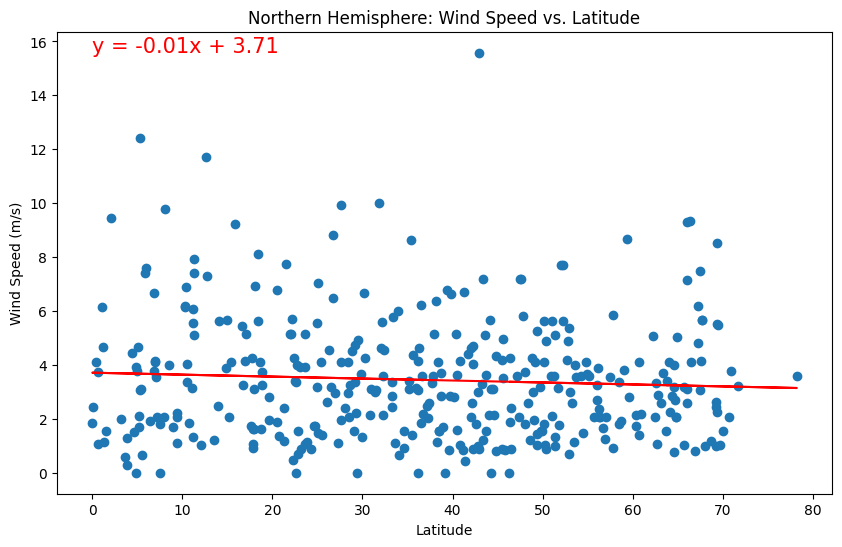

In [31]:
# Northern Hemisphere
plt.figure(figsize=(10,6))
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], 
                       "Northern Hemisphere: Wind Speed vs. Latitude", "Latitude", "Wind Speed (m/s)")
plt.savefig("output_data/north_wind_regression.png")
plt.show()

The r-value is: 0.0616


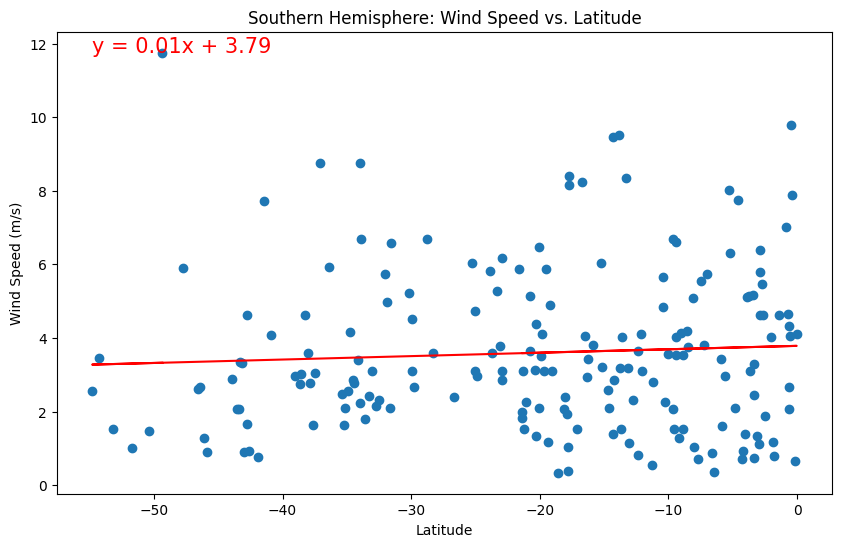

In [32]:
# Southern Hemisphere
plt.figure(figsize=(10,6))
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], 
                       "Southern Hemisphere: Wind Speed vs. Latitude", "Latitude", "Wind Speed (m/s)")
plt.savefig("output_data/south_wind_regression.png")
plt.show()

**Discussion about the linear relationship:**g:

- **Northern Hemisphere:**

    There is a very weak negative correlation between latitude and wind speed.
    As latitude increases (moving further north), wind speed tends to decrease slightly.
    The relationship is extremely weak, with a negligible slope of -0.01 and an r-value that suggests almost no correlation.

- **Southern Hemisphere:**

    There is a very weak positive correlation between latitude and wind speed.
    As latitude increases (moving closer to the equator), wind speed tends to increase slightly.
    The relationship is also extremely weak, with a minimal slope of 0.01 and an r-value of 0.0616, indicating almost no significant correlation.

**Key observations:**

The opposite slopes in the two hemispheres indicate slightly different trends in wind speed with latitude, although both trends are very weak.
The Northern Hemisphere shows a slight decrease in wind speed with increasing latitude, while the Southern Hemisphere shows a slight increase.
Both relationships are almost negligible, suggesting that latitude has a minimal impact on wind speed r than latitude alone.